<a href="https://colab.research.google.com/github/HabibaJahn/Rice_disease_detection/blob/habiba/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [ ]:
# path creation
original_dataset_dir = '/content/drive/My Drive/Ai Project/dataset'
base_dir = '/content/drive/My Drive/Ai Project/split_dataset'

# test train validation folders
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# duplicate checking
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)

classes = os.listdir(original_dataset_dir)

# classes checking and ignoring anything other than class
for class_name in classes:
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # image shuffling
    images = os.listdir(class_path)
    images = [img for img in images if os.path.isfile(os.path.join(class_path, img))]
    random.shuffle(images)

    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    for img in train_imgs:
      shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("✅ Dataset successfully split into train, val, and test sets!")


✅ Dataset successfully split into train, val, and test sets!


In [ ]:
import os

base_dir = '/content/drive/My Drive/Ai Project/split_dataset'
splits = ['train', 'val', 'test']

for split in splits:
    split_path = os.path.join(base_dir, split)
    print(f"\n📁 {split.upper()} set:")

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue

        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        print(f"  🏷️ Class '{class_name}': {num_images} images")



📁 TRAIN set:
  🏷️ Class 'Rice Hispa': 742 images
  🏷️ Class 'Neck_Blast': 700 images
  🏷️ Class 'Sheath Blight': 1045 images
  🏷️ Class 'Leaf Blast': 1206 images
  🏷️ Class 'Leaf scald': 932 images
  🏷️ Class 'Brown Spot': 1031 images
  🏷️ Class 'Bacterial Leaf Blight': 787 images
  🏷️ Class 'Healthy Rice Leaf': 689 images
  🏷️ Class 'Narrow Brown Leaf Spot': 555 images

📁 VAL set:
  🏷️ Class 'Rice Hispa': 159 images
  🏷️ Class 'Neck_Blast': 150 images
  🏷️ Class 'Sheath Blight': 224 images
  🏷️ Class 'Leaf Blast': 259 images
  🏷️ Class 'Leaf scald': 200 images
  🏷️ Class 'Brown Spot': 221 images
  🏷️ Class 'Bacterial Leaf Blight': 169 images
  🏷️ Class 'Healthy Rice Leaf': 148 images
  🏷️ Class 'Narrow Brown Leaf Spot': 119 images

📁 TEST set:
  🏷️ Class 'Rice Hispa': 160 images
  🏷️ Class 'Neck_Blast': 150 images
  🏷️ Class 'Sheath Blight': 224 images
  🏷️ Class 'Leaf Blast': 259 images
  🏷️ Class 'Leaf scald': 200 images
  🏷️ Class 'Brown Spot': 222 images
  🏷️ Class 'Bacterial Lea

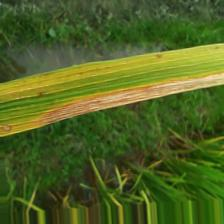

In [6]:
from PIL import Image
import IPython.display as display

# Example path to an image in your split dataset
image_path = '/content/drive/My Drive/Ai Project/split_dataset/train/Bacterial Leaf Blight/aug_0_676.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))

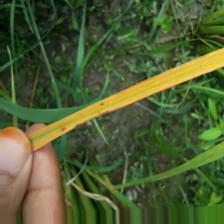

In [ ]:
image_path = '/content/drive/My Drive/Ai Project/split_dataset/test/Narrow Brown Leaf Spot/aug_0_2461.jpg'

# Open and display the image
with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))

In [2]:
!pip install tensorflow


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai Project/split_dataset/train',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Ai Project/split_dataset/val',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)


Found 7687 images belonging to 9 classes.
Found 1649 images belonging to 9 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(9, activation='softmax'))

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    # batch_size=64,
    epochs=5,
    validation_data=validation_generator,
    validation_batch_size=16
)


Epoch 1/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 2443s 20s/step - accuracy: 0.5062 - loss: 1.4023 - val_accuracy: 0.5949 - val_loss: 1.1908
Epoch 2/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6094 - loss: 1.1318 - val_accuracy: 0.6416 - val_loss: 1.0360
Epoch 3/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6482 - loss: 1.0094 - val_accuracy: 0.6859 - val_loss: 0.9523
Epoch 4/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6932 - loss: 0.8994 - val_accuracy: 0.7180 - val_loss: 0.8920
Epoch 5/5
121/121 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7313 - loss: 0.7992 - val_accuracy: 0.7301 - val_loss: 0.8412
